<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPITULO 6 - HANDS ON MACHINE LEARNING
## Árboles de decisión

En este capitulo el libro estudia los arboles de decision, cuenta que pueden ser usados como clasificadores y tambien como regresores. Ademas dice que son, obviamente, el lugar de partida para luego armar un algoritmo tipo "Random forest", el cual es uno de los metodos mas versatiles y potentes de ML en la actualidad.
Para entender como funciona un arbol el libro propone implementar uno rapidamente (sobre la base de datos IRIS, igual que en el capitulo anterior) e intentar visualizar su forma.

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
[0 1 2]


Text(0, 0.5, 'petal width (cm)')

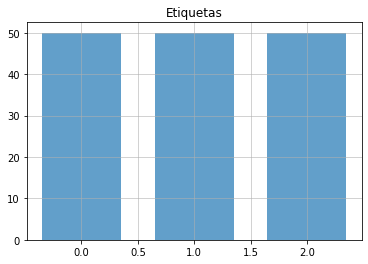

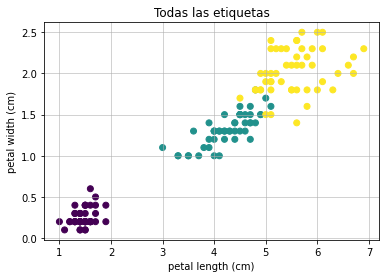

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris_data = datasets.load_iris()
df_iris = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df_iris['target'] = pd.Series(iris_data.target)
print(df_iris.head())
etiquetas = df_iris['target'].unique()
print(etiquetas)
hist_max,bin_edges = np.histogram(df_iris['target'], bins=3, range=(0, 3))
plt.bar(bin_edges[:-1], hist_max, width = 0.7,alpha=0.7,label='Etiquetas')
plt.grid(axis="both", alpha=0.7)
plt.title('Etiquetas')

plt.figure()
plt.scatter(df_iris["petal length (cm)"],df_iris["petal width (cm)"],c=df_iris["target"])
plt.grid(axis="both", alpha=0.7)
plt.title("Todas las etiquetas")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [2]:
X = df_iris[["petal length (cm)","petal width (cm)"]].copy()
y = df_iris[["target"]].copy()
print(X.head())
print(y.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2
   target
0       0
1       0
2       0
3       0
4       0
